# Box and Loop Orbits

Figure 7.6 from Chapter 7 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

A box orbit and loop orbit of identical specific energy $\epsilon \approx 1.5 v_0^2$ in the non-axisymmetric 
potential of Equation 7.70. An axis ratio $q = \sqrt{3}/2$ is assumed.

Orbits are integrated for time $t \sim 300 r_c / v_0$ using Jo Bovy's [`galpy`](https://github.com/jobovy/galpy), see Bovy, [2015, ApJS, 216, 29](https://ui.adsabs.harvard.edu/abs/2015ApJS..216...29B).  We use `potential.LogarithmicHaloPotential` and
the RK4 integrator (`rk4_c`).

In [8]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# uses galpy

from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [9]:
plotFile = 'Fig7_6.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

### Orbit integration

Use `galpy` with the `LogarithmicHaloPotential` setting the y axis ratio to b=$\sqrt{3}/2$ and a core
of 1.0.  Use the `rk4_c` RK4 orbit integrator to compute orbits for times up to $t=300(R_g/v_0)$ in 10,000 steps.

The orbit originates at x/$R_g$=3, y/R$_g$=0, with normalized velocities for the given potential value of
1.5 in these dimensionless units.

We plot two orbits:
 * box orbit - launch at angle $\pi/4$
 * tube orbit - launch at angle $\pi/2$

We also compute the bounding isopotential contour as an ellipse with pre-calculated axis ratio.

In [10]:
tMax = 300
numSteps = 10001
ts = np.linspace(0,tMax,10001)

# launch velocity

v0 = 1.0

# launch point (phi0 = 0 gives x0=r0, y0=0)

r0 = 3.0
phi0 = 0.0

# axis ratio 

q = np.sqrt(3.0)/2.0

# potential 

amp = 1.5
core = 1.0

phi = LogarithmicHaloPotential(b=q,core=core,amp=amp)

# Box Orbit

theta = np.pi/4.0
vr = v0*np.cos(theta)
vt = v0*np.sin(theta)

oBox = Orbit([r0,vr,vt,phi0])
oBox.integrate(ts,phi,method='rk4_c')

xBox = oBox.x(ts)
yBox = oBox.y(ts)

# Loop orbit

theta = np.pi/2.0
vr = 1.0*np.cos(theta)
vt = 1.0*np.sin(theta)

oLoop = Orbit([r0,vr,vt,phi0])
oLoop.integrate(ts,phi,method='rk4_c')

xLoop = oLoop.x(ts)
yLoop = oLoop.y(ts)

# bounding isopotential contour - assumes the log potential we are using

eps = oBox.E()/amp
a = np.sqrt(np.exp(2*eps) - 1)
b = q*a

thBound = np.linspace(0,2*np.pi,501)
xBound = a*np.cos(thBound)
yBound = b*np.sin(thBound)

# plotting limits

xMin = -5.0
xMax = 5.0

yMin = -5.0
yMax = 5.0

## Figure 7.6

2 panels in side by side format, 1:1 aspect ratio for each plot
 * left: box orbit
 * right: loop orbit


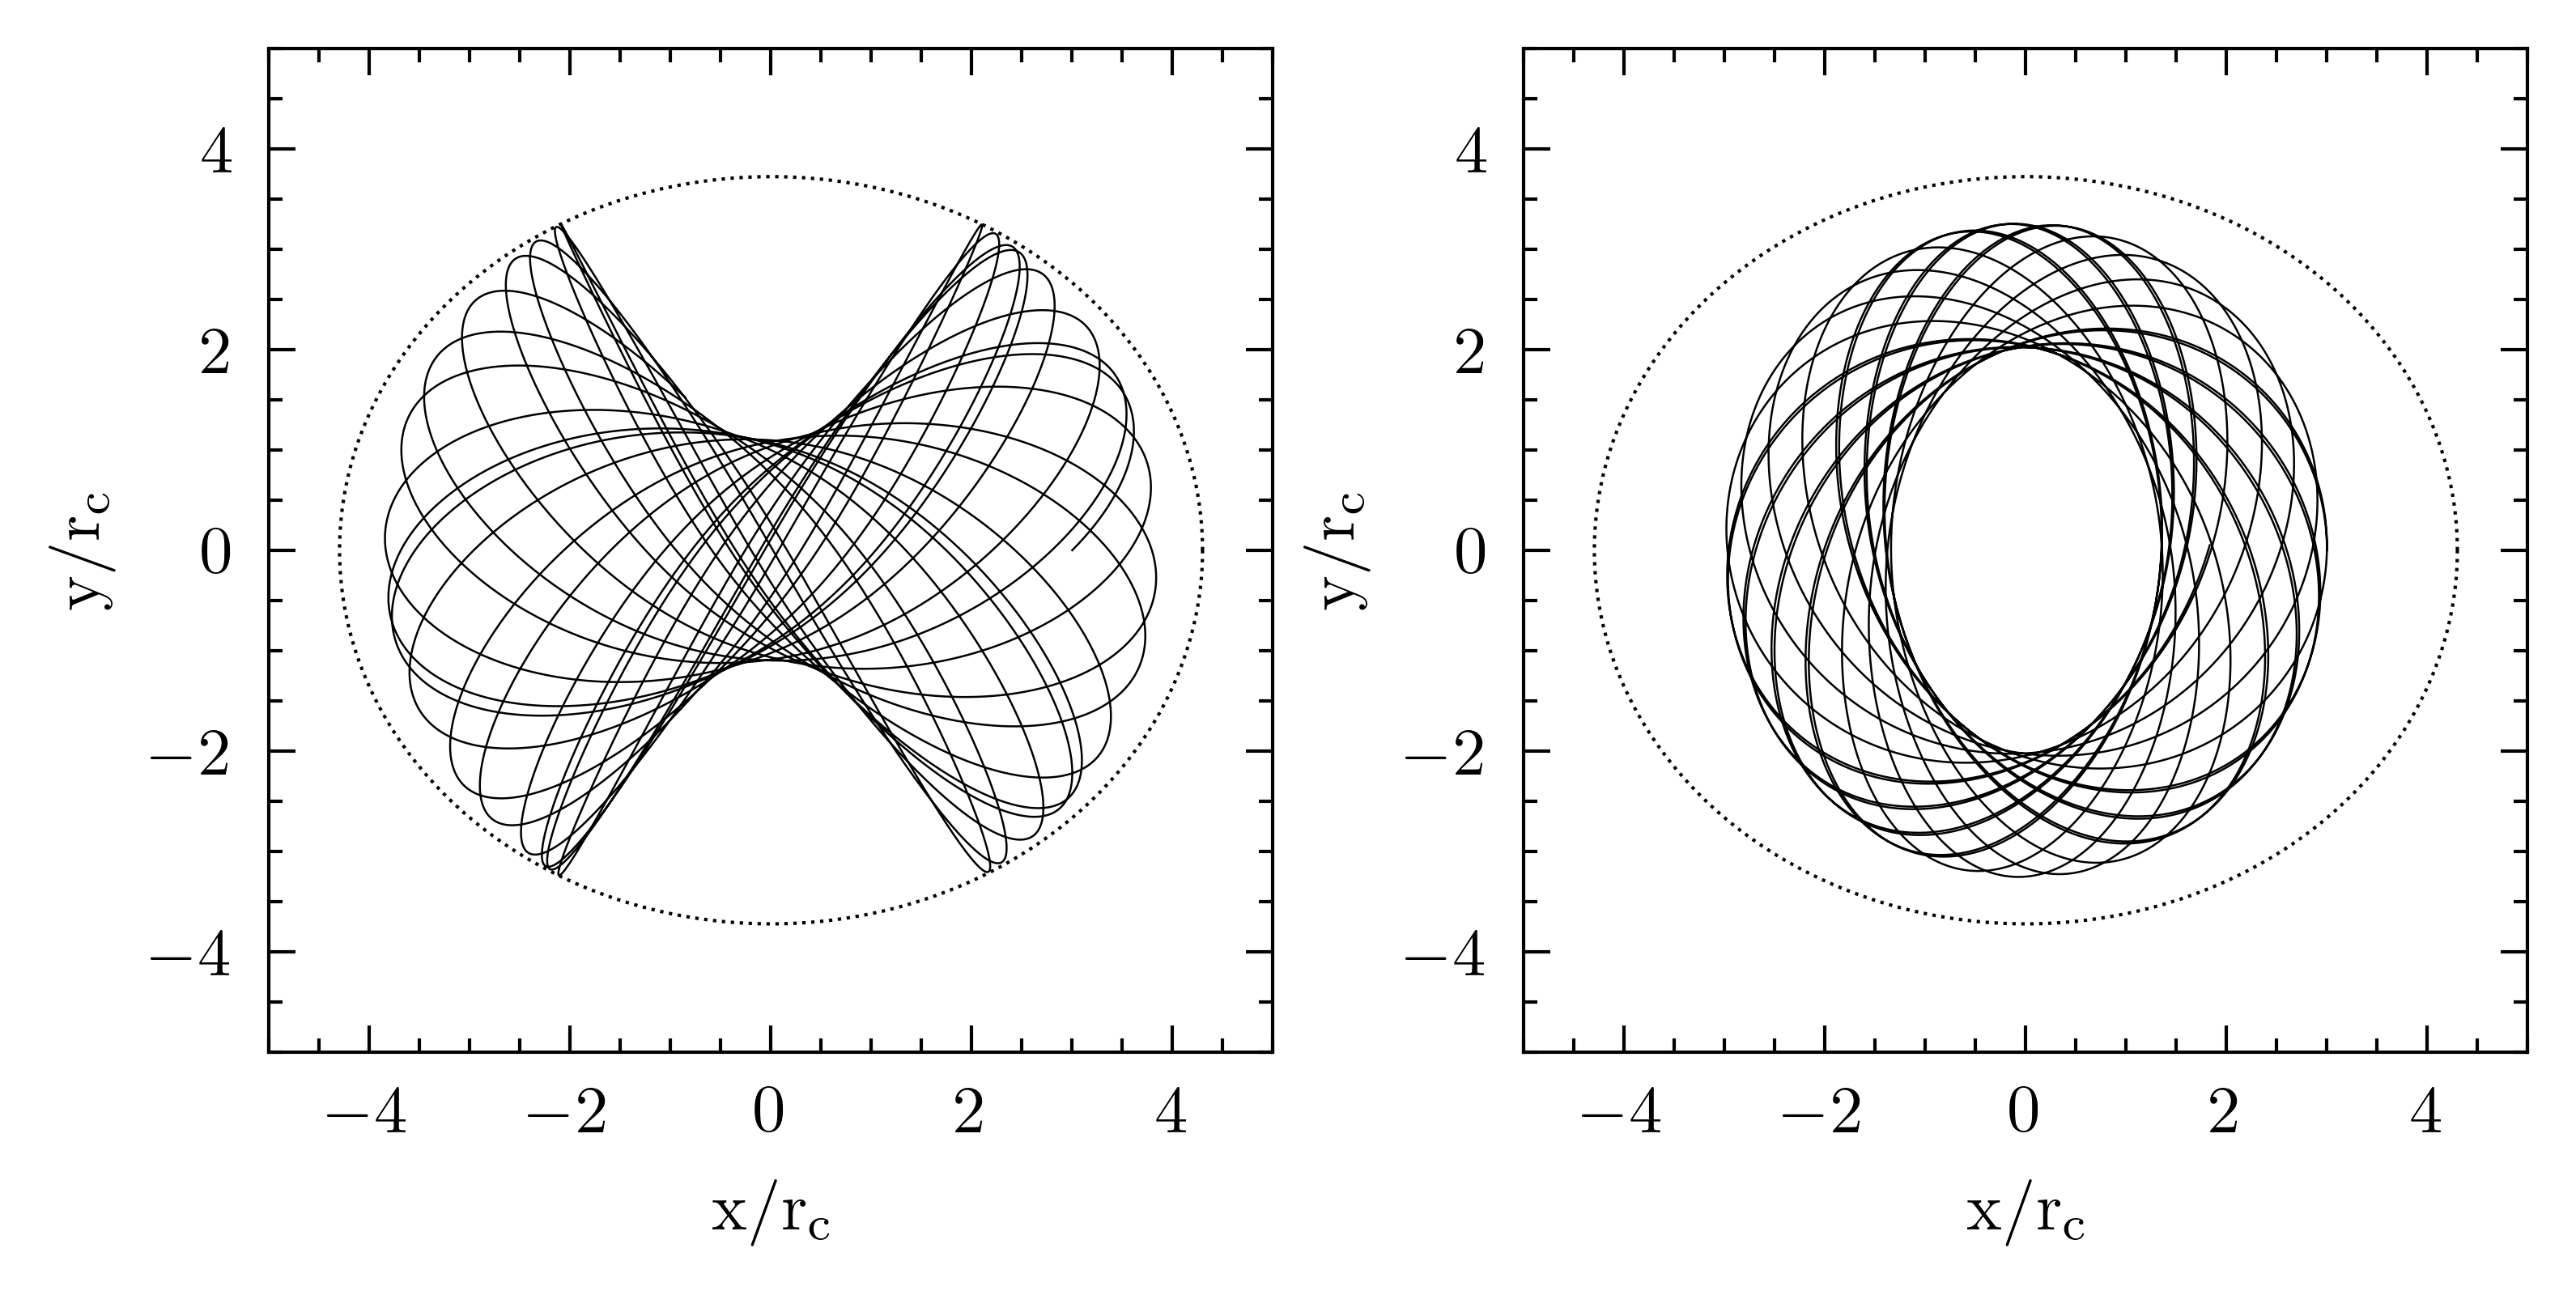

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: box orbit

ax1.set_aspect('equal')

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(xMin,xMax)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_xlabel(r'x/r$_{\rm c}$',fontsize=axisFontSize)

ax1.set_ylim(yMin,yMax)
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'y/r$_{\rm c}$',fontsize=axisFontSize)

ax1.plot(xBox,yBox,ls='-',lw=0.3,color='black',zorder=10)
ax1.plot(xBound,yBound,ls=':',lw=0.5,color='black',zorder=10)

# right panel: loop orbit

ax2.set_aspect('equal')

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(xMin,xMax)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_xlabel(r'x/r$_{\rm c}$',fontsize=axisFontSize)

ax2.set_ylim(yMin,yMax)
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_ylabel(r'y/r$_{\rm c}$',fontsize=axisFontSize)

ax2.plot(xLoop,yLoop,ls='-',lw=0.3,color='black',zorder=10)
ax2.plot(xBound,yBound,ls=':',lw=0.5,color='black',zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')